We're going to do some statistical analysis of catch data from the US East Coast. You can grab the data from
https://www.seaaroundus.org/data/#/eez/851
or from the github repository.

In [1]:
df = read.csv("SAU EEZ 851 v50-1.csv")

In [2]:
tail(df)

,area_name,area_type,data_layer,uncertainty_score,year,scientific_name,common_name,functional_group,commercial_group,fishing_entity,fishing_sector,catch_type,reporting_status,gear_type,end_use_type,tonnes,landed_value
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
375954,USA (East Coast),eez,Assigned Tuna RFMO catch,NA,2019,Isurus oxyrinchus,Shortfin mako,Large sharks (>=90 cm),Sharks & rays,USA,Industrial,Landings,Reported,longline,Direct human consumption,9.030465285,26950.564269
375955,USA (East Coast),eez,Assigned Tuna RFMO catch,NA,2019,Isurus oxyrinchus,Shortfin mako,Large sharks (>=90 cm),Sharks & rays,USA,Industrial,Landings,Reported,longline,Fishmeal and fish oil,0.004519752,3.353645
375956,USA (East Coast),eez,Assigned Tuna RFMO catch,NA,2019,Isurus oxyrinchus,Shortfin mako,Large sharks (>=90 cm),Sharks & rays,USA,Industrial,Landings,Reported,longline,Other,0.004519752,3.353645
375957,USA (East Coast),eez,Assigned Tuna RFMO catch,NA,2019,Isurus oxyrinchus,Shortfin mako,Large sharks (>=90 cm),Sharks & rays,USA,Industrial,Landings,Reported,hand lines,Direct human consumption,0.008373655,24.990376
375958,USA (East Coast),eez,Assigned Tuna RFMO catch,NA,2019,Isurus oxyrinchus,Shortfin mako,Large sharks (>=90 cm),Sharks & rays,USA,Industrial,Landings,Reported,gillnet,Direct human consumption,0.041868274,124.951880
375959,USA (East Coast),eez,Assigned Tuna RFMO catch,NA,2019,Prionace glauca,Blue shark,Large sharks (>=90 cm),Sharks & rays,USA,Industrial,Landings,Reported,pole and line,Direct human consumption,4.822358957,8283.822088


In [3]:
library(dplyr)
df2 = df %>% group_by(year, gear_type) %>% summarize(tonnes=sum(tonnes), landed_value=sum(landed_value, na.rm=T))
write.csv(df2, "SAU EEZ 851 v50-1-gearyear.csv", row.names=F)

Warning message:
“package ‘dplyr’ was built under R version 4.1.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


In [4]:
df = read.csv("SAU EEZ 851 v50-1-gearyear.csv")

In [5]:
head(df)

,year,gear_type,tonnes,landed_value
,<int>,<chr>,<dbl>,<dbl>
1,1950,artisanal fishing gear,448.92324,3.525815e+06
2,1950,bagnets,1851.69635,2.011862e+06
3,1950,bottom trawl,416010.75582,5.389172e+08
4,1950,cast nets,30.43376,7.854344e+04
5,1950,dredge,519405.49070,3.702003e+09
6,1950,gillnet,19652.34152,4.281247e+07


In [6]:
unique(df$gear_type)

[1] "artisanal fishing gear"  "bagnets"                
 [3] "bottom trawl"            "cast nets"              
 [5] "dredge"                  "gillnet"                
 [7] "hand lines"              "hand or tools"          
 [9] "harpoon"                 "lines"                  
[11] "longline"                "mixed gear"             
[13] "other industrial"        "other nets"             
[15] "pole and line"           "pots or traps"          
[17] "purse seine"             "shrimp trawl"           
[19] "small scale lines"       "small scale trammel net"
[21] "trammel nets"            "unknown by source"      
[23] "unknown class"           "pelagic trawl"          
[25] "other"

In [7]:
length(unique(df$gear_type))

[1] 25

In [8]:
library(ggplot2)

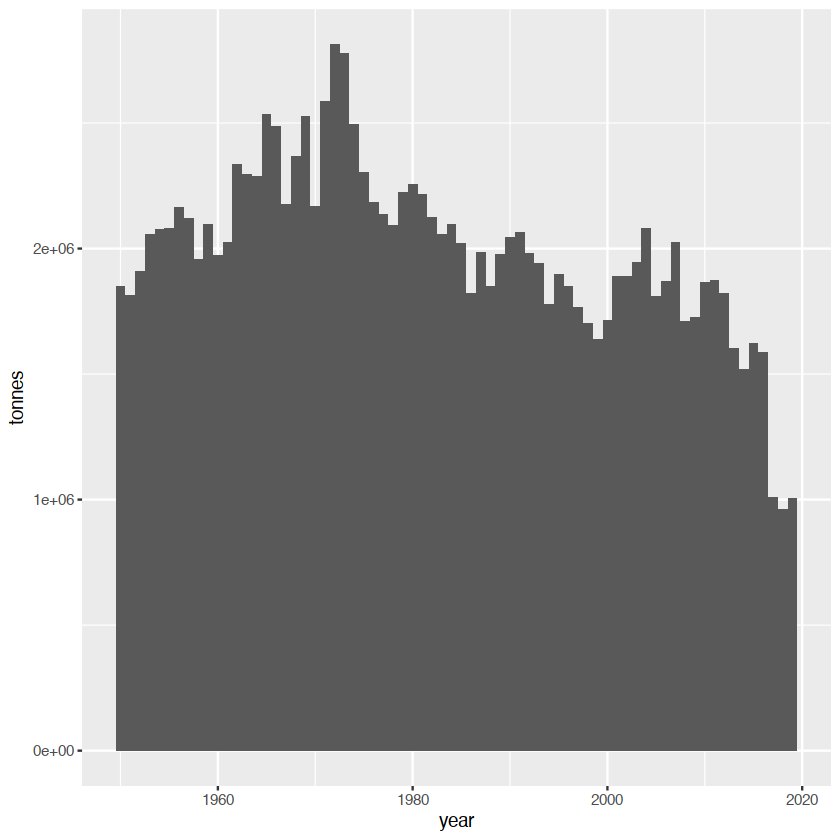

In [9]:
ggplot(df, aes(x=year, y=tonnes)) +
  geom_col()

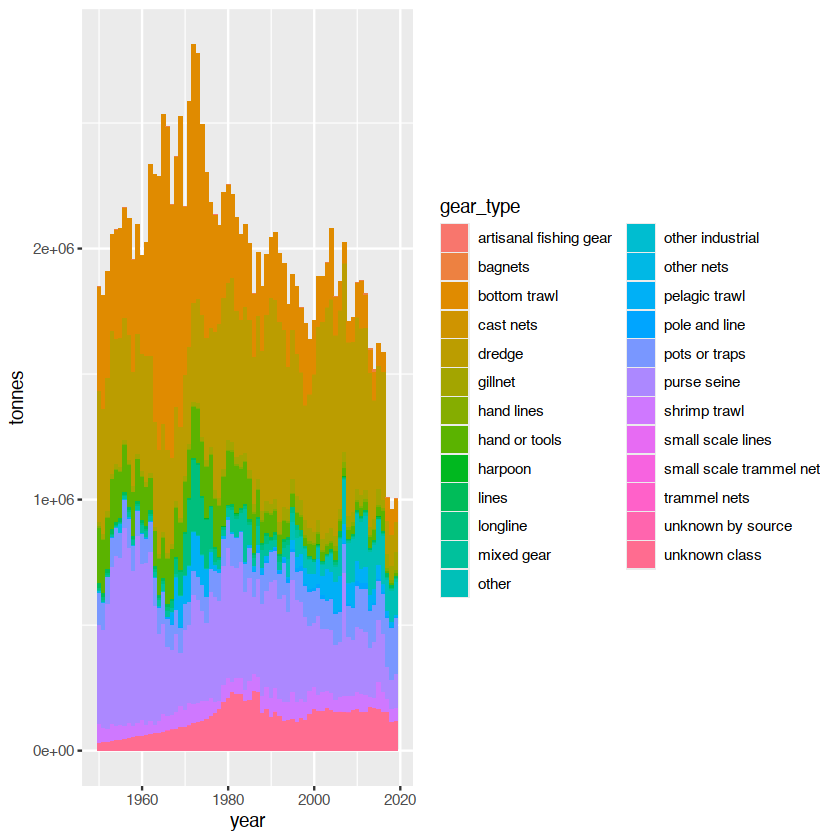

In [10]:
ggplot(df, aes(x=year, y=tonnes, fill=gear_type)) +
  geom_col()

Question 1: What is the tonnage caught with a particular gear in a given year?

In [11]:
df[df$year == 2000,]

,year,gear_type,tonnes,landed_value
,<int>,<chr>,<dbl>,<dbl>
1132,2000,artisanal fishing gear,1.732641e+02,4.365858e+06
1133,2000,bagnets,4.563375e+02,2.156172e+06
1134,2000,bottom trawl,2.166118e+05,4.721887e+08
1135,2000,cast nets,1.368163e+03,2.722587e+06
1136,2000,dredge,6.244453e+05,3.171923e+09
1137,2000,gillnet,4.631605e+04,7.887170e+07
1138,2000,hand lines,8.635126e+03,4.784827e+07
1139,2000,hand or tools,5.451641e+04,2.695713e+08
1140,2000,harpoon,3.314865e+02,5.739549e+06


In [12]:
df[df$year == 2000,]$tonnes

[1] 1.732641e+02 4.563375e+02 2.166118e+05 1.368163e+03 6.244453e+05
 [6] 4.631605e+04 8.635126e+03 5.451641e+04 3.314865e+02 4.042884e+03
[11] 6.730728e+03 2.469563e+03 4.664365e+04 5.199055e+01 5.431830e+04
[16] 1.201828e+04 1.275787e+05 2.564267e+05 8.550969e+04 4.563136e+00
[21] 4.235771e+01 1.651382e+05

In [13]:
df$tonnes[df$year == 2000]

[1] 1.732641e+02 4.563375e+02 2.166118e+05 1.368163e+03 6.244453e+05
 [6] 4.631605e+04 8.635126e+03 5.451641e+04 3.314865e+02 4.042884e+03
[11] 6.730728e+03 2.469563e+03 4.664365e+04 5.199055e+01 5.431830e+04
[16] 1.201828e+04 1.275787e+05 2.564267e+05 8.550969e+04 4.563136e+00
[21] 4.235771e+01 1.651382e+05

In [15]:
df$tonnes[df$gear_type == 'bottom trawl']

[1]  416010.76  450849.39  426192.91  386871.70  434058.71  437320.51
 [7]  439806.37  464082.70  448668.31  437739.69  392474.10  452057.79
[13]  762251.68  986518.76 1089922.78 1232713.79 1289724.81 1010012.09
[19]  998876.35 1236564.04  670956.79  980651.32 1031368.32  979186.57
[25]  761933.75  659934.60  499077.12  466805.40  394794.41  418815.92
[31]  390345.71  336574.23  373712.89  343526.81  333207.36  306947.64
[37]  254765.97  253539.26  260388.82  243424.78  243662.78  268592.25
[43]  273104.72  267783.64  249121.49  222176.02  271818.23  258579.97
[49]  327094.37  220036.52  216611.79  201517.31  184024.45  177879.16
[55]  283272.70  154617.50  115148.90   82096.96   84182.77   96758.20
[61]  135872.28  190413.90  131540.09   91494.54  113055.98   90909.17
[67]   79280.69   90875.83  100733.49   88899.20

In [16]:
sum(df$tonnes[df$gear_type == 'bottom trawl'])

[1] 29063830

In [17]:
df$year == 2000 & df$gear_type == 'bottom trawl'

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [18]:
df$tonnes[df$year == 2000 & df$gear_type == 'bottom trawl']

[1] 216611.8

In [19]:
df[df$year == 2000 & df$gear_type == "bottom trawl",]

,year,gear_type,tonnes,landed_value
,<int>,<chr>,<dbl>,<dbl>
1134,2000,bottom trawl,216611.8,472188677


In [20]:
subset(df, year == 2000 & gear_type == "bottom trawl")

,year,gear_type,tonnes,landed_value
,<int>,<chr>,<dbl>,<dbl>
1134,2000,bottom trawl,216611.8,472188677


Question 2: What is the average value for a given gear type?

In [21]:
subset(df, gear_type == 'bottom trawl')

,year,gear_type,tonnes,landed_value
,<int>,<chr>,<dbl>,<dbl>
3,1950,bottom trawl,416010.8,538917163
26,1951,bottom trawl,450849.4,586264212
49,1952,bottom trawl,426192.9,528159119
72,1953,bottom trawl,386871.7,445512495
95,1954,bottom trawl,434058.7,668991801
118,1955,bottom trawl,437320.5,642494355
141,1956,bottom trawl,439806.4,601300494
164,1957,bottom trawl,464082.7,715416493
187,1958,bottom trawl,448668.3,702238516


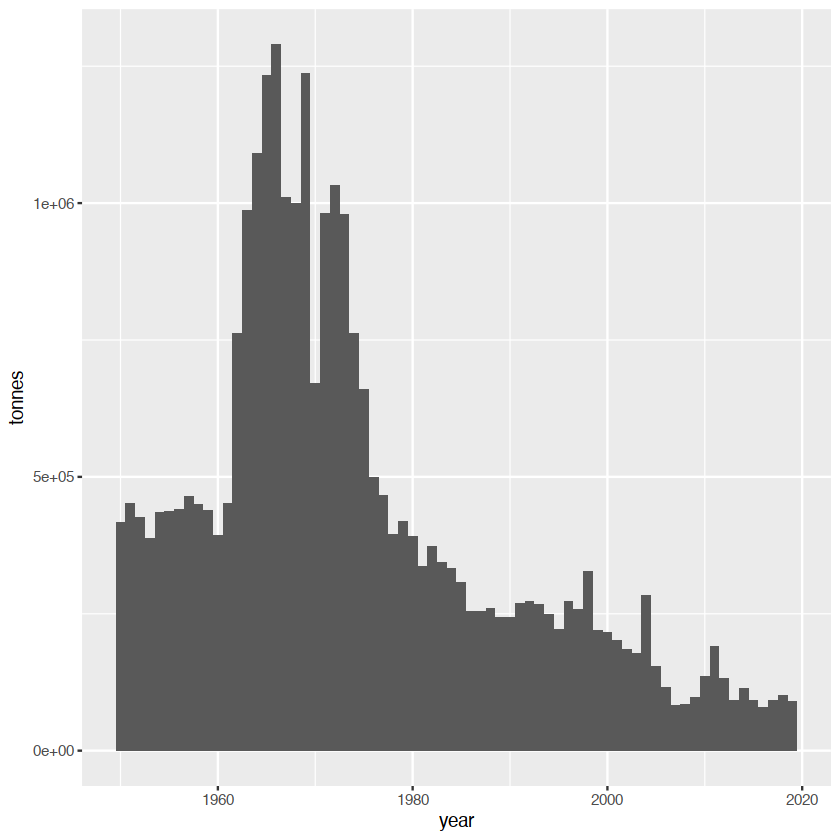

In [22]:
ggplot(subset(df, gear_type == 'bottom trawl'), aes(x=year, y=tonnes)) +
  geom_col()

In [23]:
mean(df$tonnes[df$gear_type == 'bottom trawl'])

[1] 415197.6

In [24]:
quantile(df$tonnes[df$gear_type == "bottom trawl"])

0%        25%        50%        75%       100% 
  79280.69  205290.93  330150.87  451755.69 1289724.81

Statistical model:
$$tonnes \sim \mathcal{N}(MEAN, STDDEV)$$

In [25]:
sd(df$tonnes[df$gear_type == 'bottom trawl'])

[1] 318485.2

In [26]:
faketonnes = rnorm(1000, 415197.568343814, 318485.223031723)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


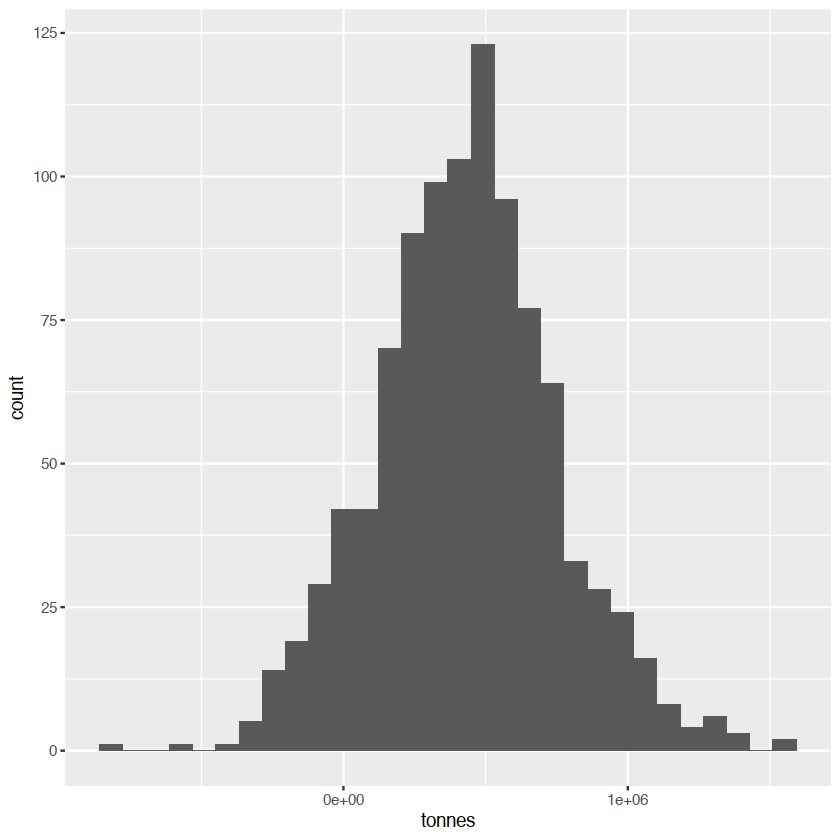

In [27]:
ggplot(data.frame(tonnes=faketonnes), aes(x=tonnes)) +
  geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


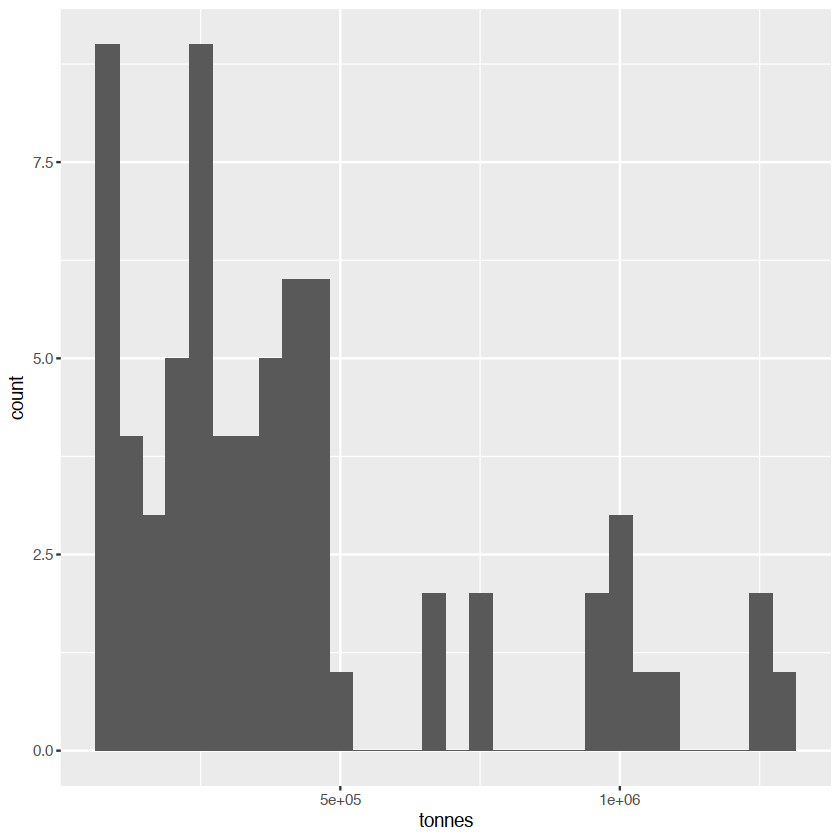

In [29]:
ggplot(subset(df, gear_type == 'bottom trawl'), aes(x=tonnes)) +
  geom_histogram()

In [30]:
pdf1 = data.frame(type='real', tonnes=df$tonnes[df$gear_type == 'bottom trawl'])

In [31]:
pdf2 = data.frame(type='fake', tonnes=faketonnes)

In [32]:
pdf = rbind(pdf1, pdf2)

In [33]:
tail(pdf)

,type,tonnes
,<chr>,<dbl>
1065,fake,398894.17
1066,fake,99498.42
1067,fake,-288173.74
1068,fake,679354.62
1069,fake,802781.22
1070,fake,-39685.80


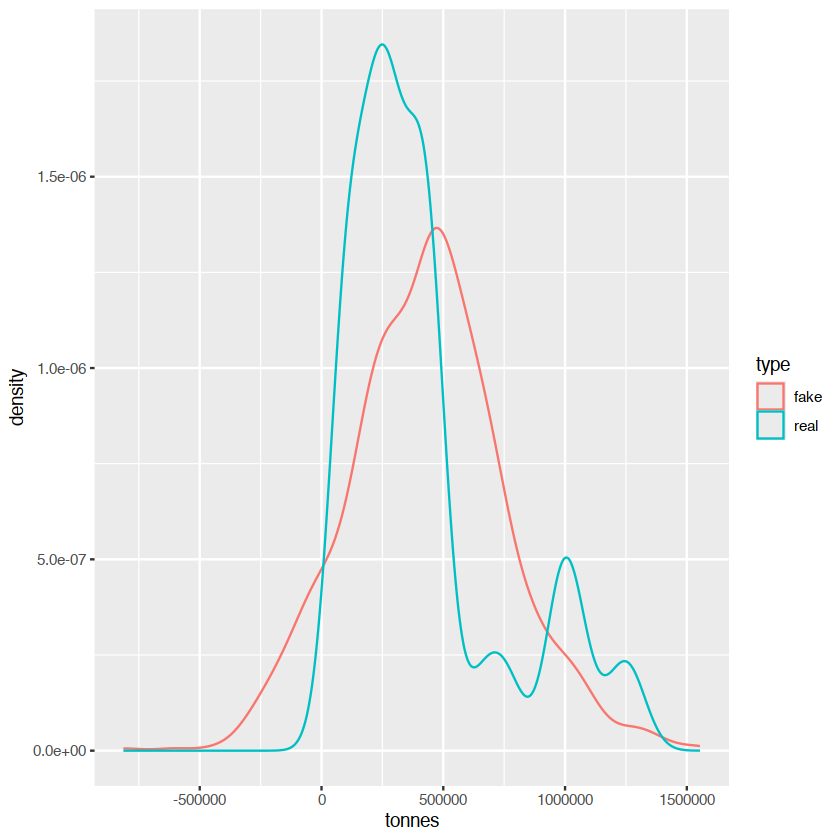

In [34]:
ggplot(pdf, aes(x=tonnes, colour=type)) +
  geom_density()

Statistical model:
$$log(tonnes) \sim \mathcal{N}(MEAN, STDDEV)$$

In [35]:
mean(log(df$tonnes[df$gear_type == 'bottom trawl']))

[1] 12.66143

In [36]:
sd(log(df$tonnes[df$gear_type == 'bottom trawl']))

[1] 0.7618767

In [37]:
faketonnes = exp(rnorm(1000, 12.661429700571, 0.761876733242941))

In [38]:
pdf2 = data.frame(type='fake', tonnes=faketonnes)

In [39]:
pdf = rbind(pdf1, pdf2)

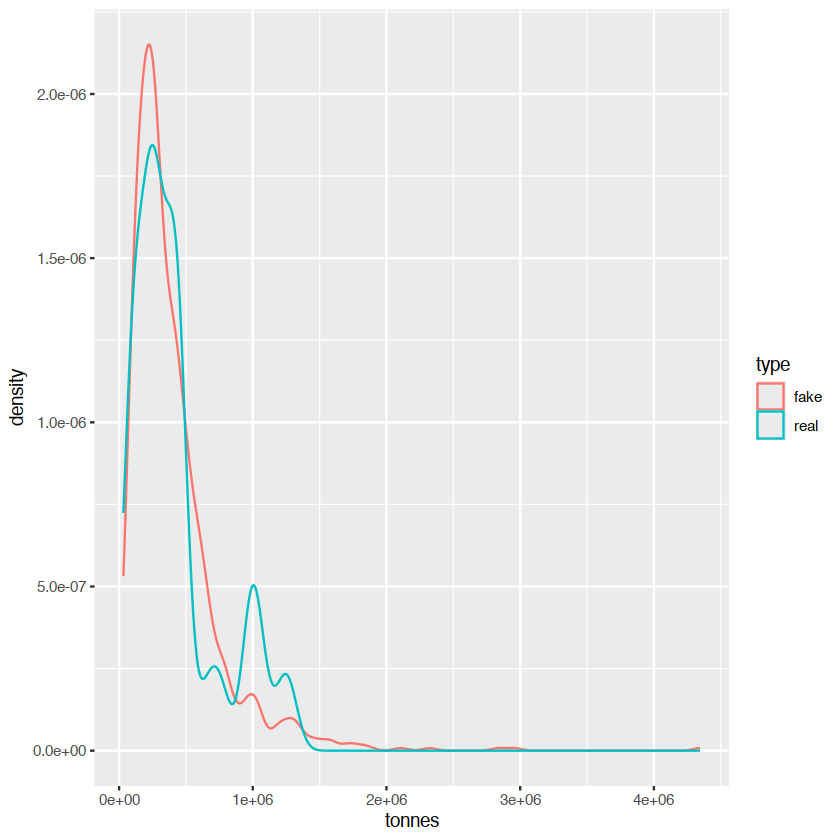

In [40]:
ggplot(pdf, aes(x=tonnes, colour=type)) +
  geom_density()

Question 3: Is bottom trawling declining?

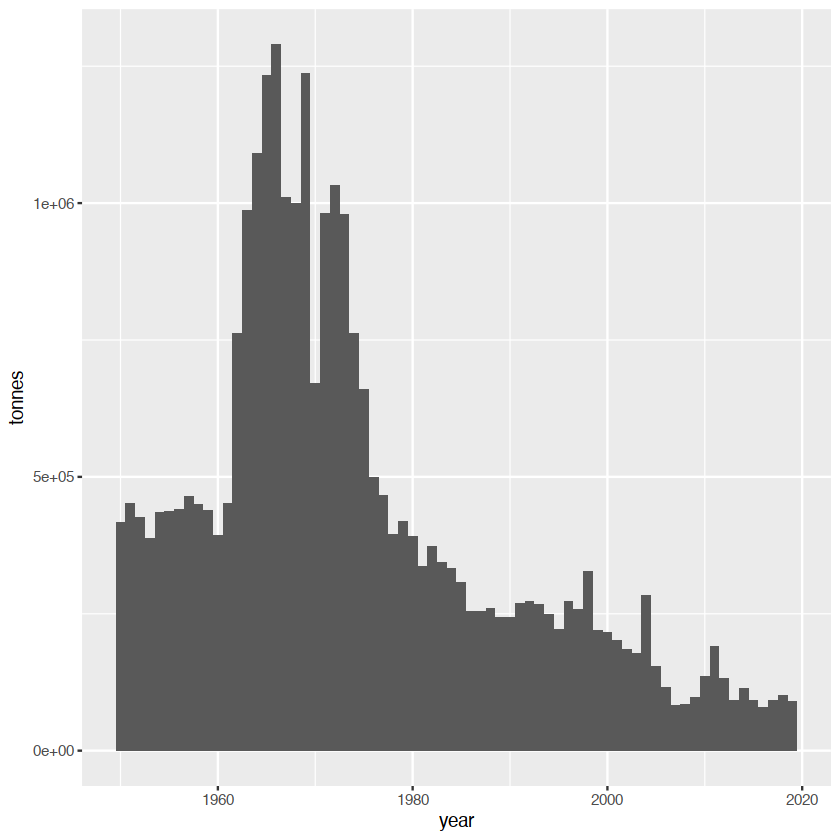

In [41]:
ggplot(subset(df, gear_type == 'bottom trawl'), aes(x=year, y=tonnes)) +
  geom_col()

Statistical model:
$$tonnes \sim \mathcal{N}(INTERCEPT + SLOPE \cdot year, STDDEV)$$

In [42]:
lm(tonnes ~ 1 + year, subset(df, gear_type == 'bottom trawl'))


Call:
lm(formula = tonnes ~ 1 + year, data = subset(df, gear_type == 
    "bottom trawl"))

Coefficients:
(Intercept)         year  
   21119880       -10433  


In [43]:
summary(lm(tonnes ~ 1 + year, subset(df, gear_type == 'bottom trawl')))


Call:
lm(formula = tonnes ~ 1 + year, data = subset(df, gear_type == 
    "bottom trawl"))

Residuals:
    Min      1Q  Median      3Q     Max 
-359132 -111372  -47646   34698  681513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21119880    2807236   7.523 1.61e-10 ***
year          -10433       1414  -7.376 2.97e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 239100 on 68 degrees of freedom
Multiple R-squared:  0.4445,	Adjusted R-squared:  0.4363 
F-statistic:  54.4 on 1 and 68 DF,  p-value: 2.972e-10


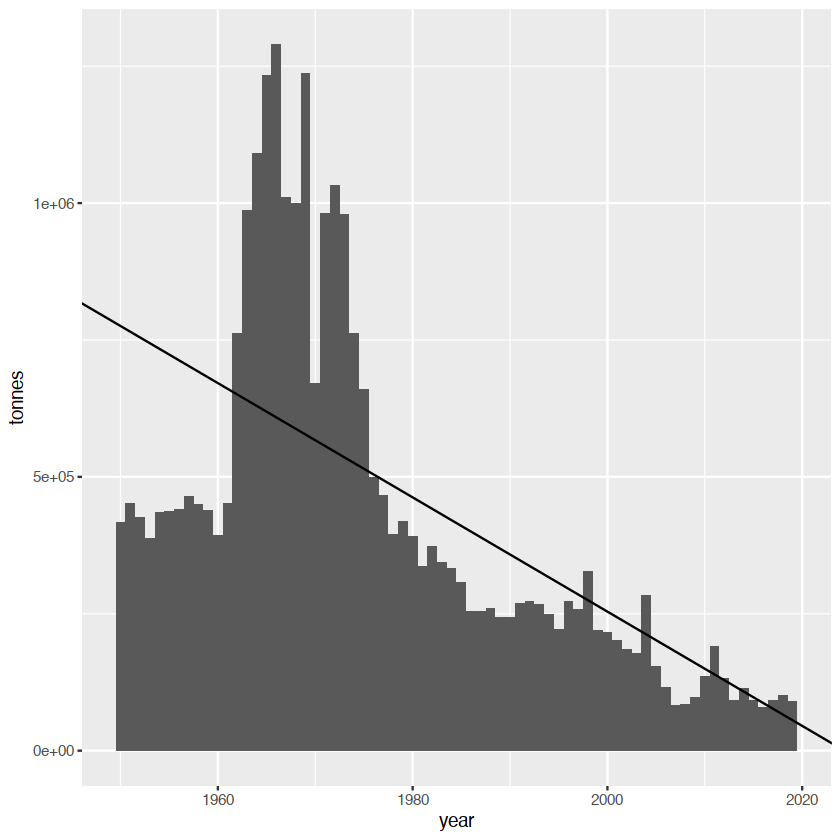

In [44]:
ggplot(subset(df, gear_type == 'bottom trawl'), aes(x=year, y=tonnes)) +
  geom_col() + geom_abline(intercept=21119880, slope=-10433)

Statistical model:
$$log(tonnes) \sim \mathcal{N}(INTERCEPT + SLOPE \cdot year, STDDEV)$$

In [45]:
summary(lm(log(tonnes) ~ 1 + year, subset(df, gear_type == 'bottom trawl')))


Call:
lm(formula = log(tonnes) ~ 1 + year, data = subset(df, gear_type == 
    "bottom trawl"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79299 -0.32993  0.00269  0.19390  0.88568 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.211344   5.045741   14.71   <2e-16 ***
year        -0.031015   0.002542  -12.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4298 on 68 degrees of freedom
Multiple R-squared:  0.6864,	Adjusted R-squared:  0.6818 
F-statistic: 148.8 on 1 and 68 DF,  p-value: < 2.2e-16


In [46]:
df$predicted = exp(74.211344 - 0.031015*df$year)

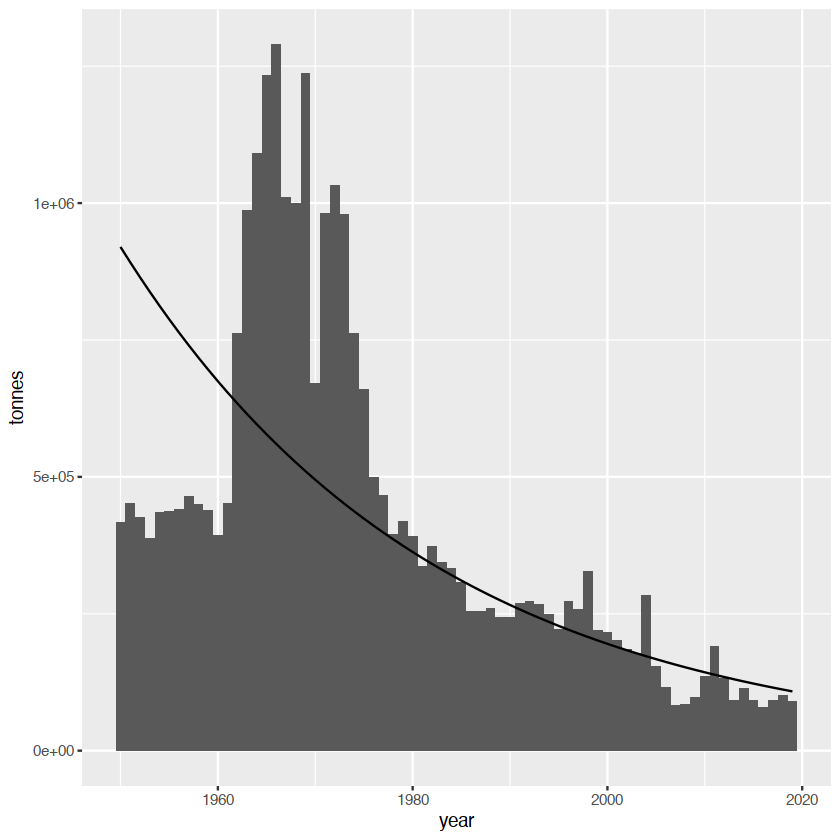

In [47]:
ggplot(subset(df, gear_type == 'bottom trawl'), aes(x=year, y=tonnes)) +
  geom_col() + geom_line(aes(y=predicted))